### 학습목표
1. 아이템별 지표 확인하기
2. 시간별 지역별 판매 지표 확인하기

In [1]:
import numpy as np
import pandas as pd
# seaborn
import seaborn as sns
COLORS = sns.color_palette()

%matplotlib inline

#### 데이터 로딩
1. 정제된 데이터 사용(retail.csv)

In [2]:
dtypes = {
    'UnitPrice': np.float32,
    'CustomerID': np.int32,
    'Quantity': np.int32
}
retail = pd.read_csv('../source_data/OnlineRetailClean.csv', dtype=dtypes)
retail.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34


#### 날짜 타입 데이터 변환
 - 문자열로 로딩하는 것보다 date/datetime 타입으로 로딩하는 것이 분석에 용이

In [3]:
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'], infer_datetime_format=True)
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Unnamed: 0     397884 non-null  int64         
 1   InvoiceNo      397884 non-null  int64         
 2   StockCode      397884 non-null  object        
 3   Description    397884 non-null  object        
 4   Quantity       397884 non-null  int32         
 5   InvoiceDate    397884 non-null  datetime64[ns]
 6   UnitPrice      397884 non-null  float32       
 7   CustomerID     397884 non-null  int32         
 8   Country        397884 non-null  object        
 9   CheckoutPrice  397884 non-null  float64       
dtypes: datetime64[ns](1), float32(1), float64(1), int32(2), int64(2), object(3)
memory usage: 25.8+ MB


/var/folders/h8/dk4pn1l11_5f5z7pscs8gr0r0000gn/T/ipykernel_4748/4238999679.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'], infer_datetime_format=True)


#### 해당 기간 동안의 매출
 - 전체 매출
 - 국가별 매출
 - 월별 매출
 - 요일별 매출
 - 시간별 매출

#### 전체 매출

In [4]:
total_revenue = retail['CheckoutPrice'].sum()
print(f'{total_revenue:,}')

8,911,407.904


#### 국가별 매출

In [6]:
rev_by_countries = retail.groupby('Country').agg({'CheckoutPrice': 'sum'}).sort_values(by='CheckoutPrice')
rev_by_countries

,CheckoutPrice
Country,
Saudi Arabia,145.920
Bahrain,548.400
Czech Republic,826.740
RSA,1002.310
Brazil,1143.600
European Community,1300.250
Lithuania,1661.060
Lebanon,1693.880
United Arab Emirates,1902.280


In [12]:
print(round(rev_by_countries / total_revenue,5) *100)

                      CheckoutPrice
Country                            
Saudi Arabia                  0.002
Bahrain                       0.006
Czech Republic                0.009
RSA                           0.011
Brazil                        0.013
European Community            0.015
Lithuania                     0.019
Lebanon                       0.019
United Arab Emirates          0.021
Unspecified                   0.030
Malta                         0.031
USA                           0.040
Canada                        0.041
Iceland                       0.048
Greece                        0.053
Israel                        0.081
Poland                        0.082
Austria                       0.114
Cyprus                        0.153
Italy                         0.196
Denmark                       0.213
Channel Islands               0.229
Singapore                     0.239
Finland                       0.253
Portugal                      0.375
Norway                      

In [14]:
rev_by_countries = round(rev_by_countries / total_revenue,5) *100

[Text(0, 0, 'Saudi Arabia'),
 Text(1, 0, 'Bahrain'),
 Text(2, 0, 'Czech Republic'),
 Text(3, 0, 'RSA'),
 Text(4, 0, 'Brazil'),
 Text(5, 0, 'European Community'),
 Text(6, 0, 'Lithuania'),
 Text(7, 0, 'Lebanon'),
 Text(8, 0, 'United Arab Emirates'),
 Text(9, 0, 'Unspecified'),
 Text(10, 0, 'Malta'),
 Text(11, 0, 'USA'),
 Text(12, 0, 'Canada'),
 Text(13, 0, 'Iceland'),
 Text(14, 0, 'Greece'),
 Text(15, 0, 'Israel'),
 Text(16, 0, 'Poland'),
 Text(17, 0, 'Austria'),
 Text(18, 0, 'Cyprus'),
 Text(19, 0, 'Italy'),
 Text(20, 0, 'Denmark'),
 Text(21, 0, 'Channel Islands'),
 Text(22, 0, 'Singapore'),
 Text(23, 0, 'Finland'),
 Text(24, 0, 'Portugal'),
 Text(25, 0, 'Norway'),
 Text(26, 0, 'Japan'),
 Text(27, 0, 'Sweden'),
 Text(28, 0, 'Belgium'),
 Text(29, 0, 'Switzerland'),
 Text(30, 0, 'Spain'),
 Text(31, 0, 'Australia'),
 Text(32, 0, 'France'),
 Text(33, 0, 'Germany'),
 Text(34, 0, 'EIRE'),
 Text(35, 0, 'Netherlands'),
 Text(36, 0, 'United Kingdom')]

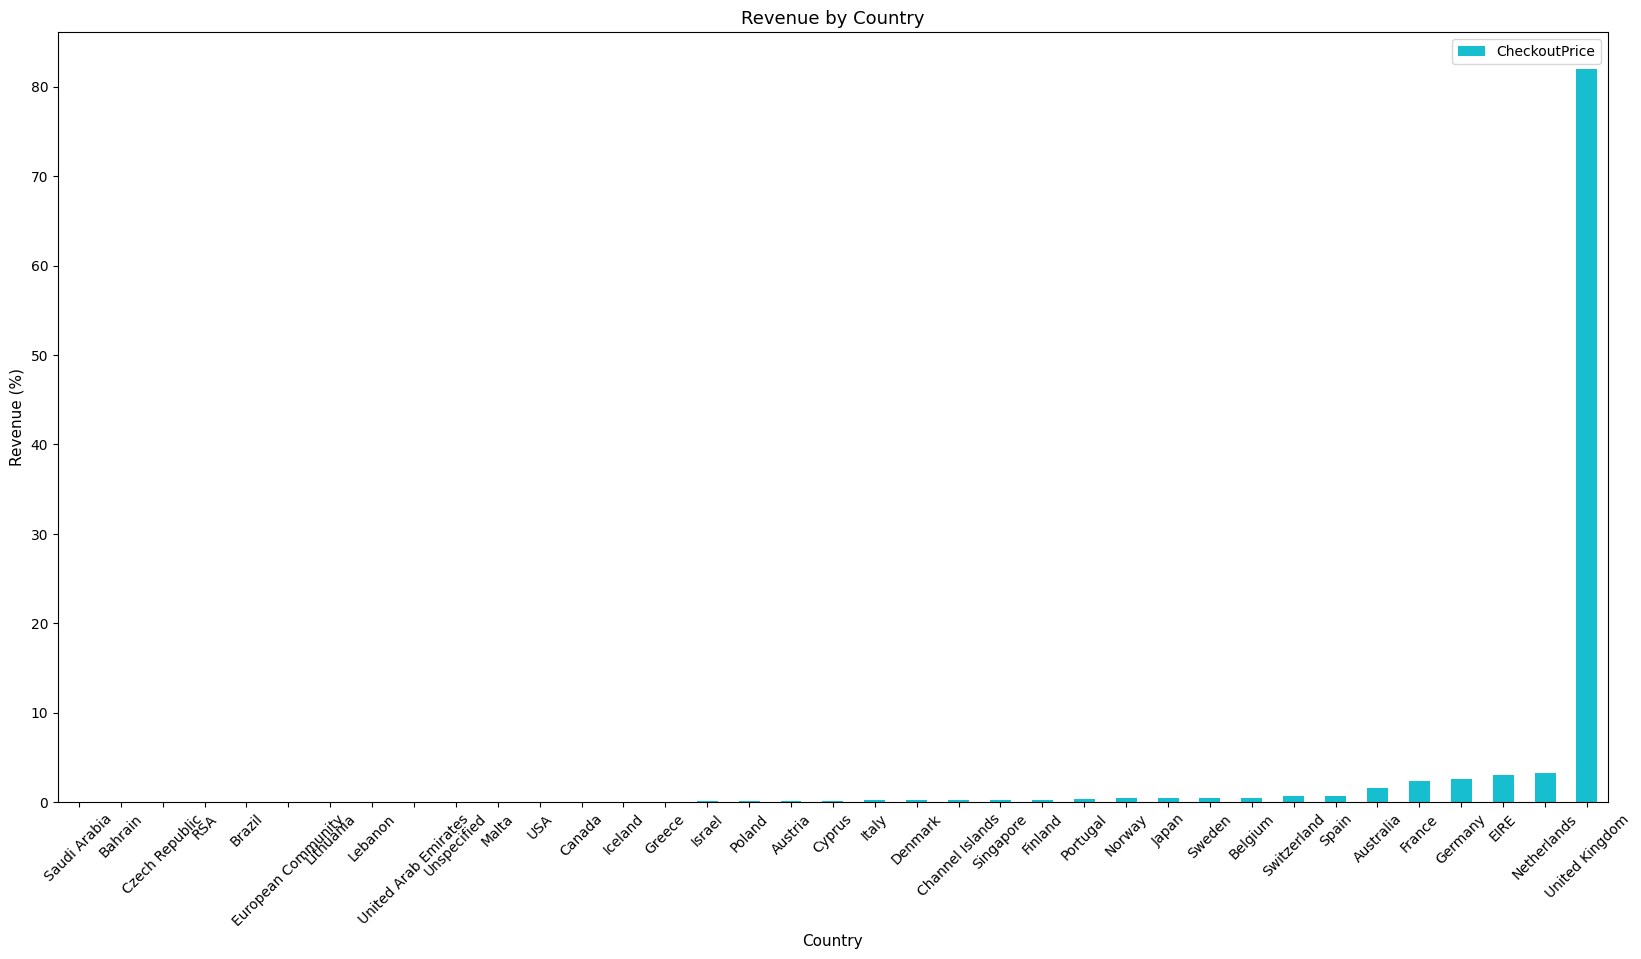

In [16]:
plot = rev_by_countries.plot(kind='bar', color=COLORS[-1], figsize=(20, 10))
plot.set_xlabel('Country', fontsize=11)
plot.set_ylabel('Revenue (%)', fontsize=11)
plot.set_title('Revenue by Country', fontsize=13)
plot.set_xticklabels(labels=rev_by_countries.index, rotation=45)

#### 그래프 유틸 함수

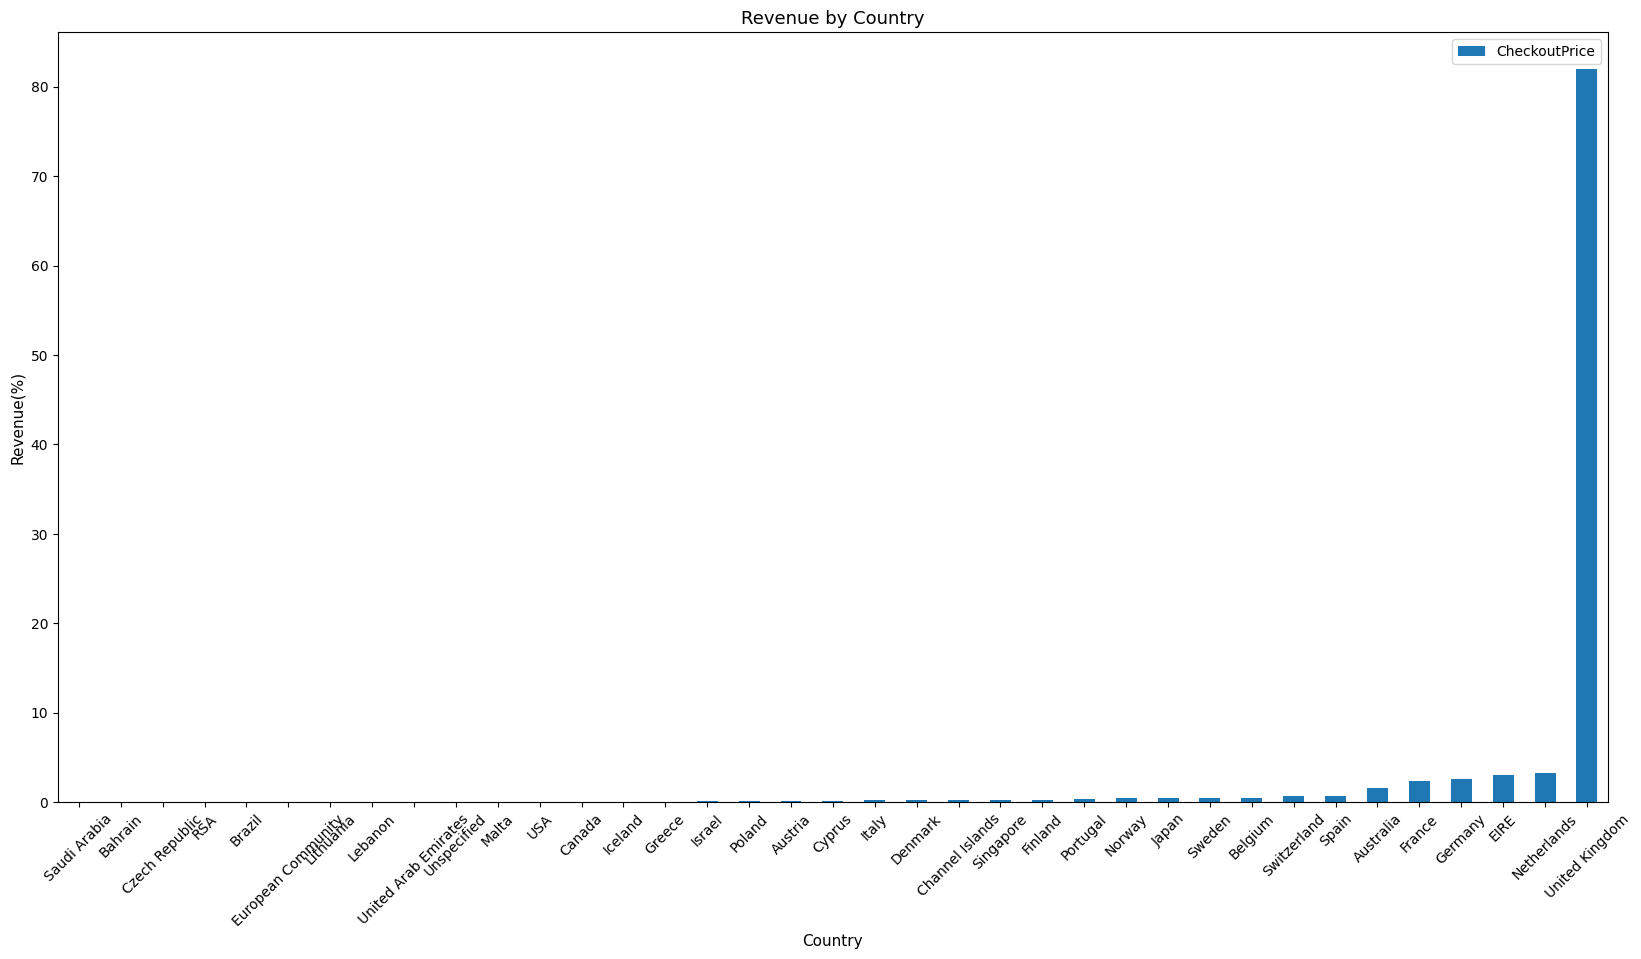

In [18]:
def plot_bar(df, xlabel, ylabel, title, color=COLORS[0], figsize=(20, 10), rotation=45):
    plot = df.plot(kind='bar', color=color, figsize=figsize)
    plot.set_xlabel(xlabel, fontsize=11)
    plot.set_ylabel(ylabel, fontsize=11)
    plot.set_title(title, fontsize=13)
    plot.set_xticklabels(labels=df.index, rotation=rotation)
                   
plot_bar(rev_by_countries, 'Country', 'Revenue(%)', 'Revenue by Country')

#### 월별 매출

In [21]:
retail['InvoiceDate'].sort_values(ascending=False)

397883   2011-12-09 12:50:00
397876   2011-12-09 12:50:00
397870   2011-12-09 12:50:00
397871   2011-12-09 12:50:00
397872   2011-12-09 12:50:00
                 ...        
3        2010-12-01 08:26:00
1        2010-12-01 08:26:00
5        2010-12-01 08:26:00
6        2010-12-01 08:26:00
0        2010-12-01 08:26:00
Name: InvoiceDate, Length: 397884, dtype: datetime64[ns]

In [22]:
def extract_month(date):
    month = str(date.month)
    if date.month < 10:
        month = '0' + month
    return str(date.year) + month 

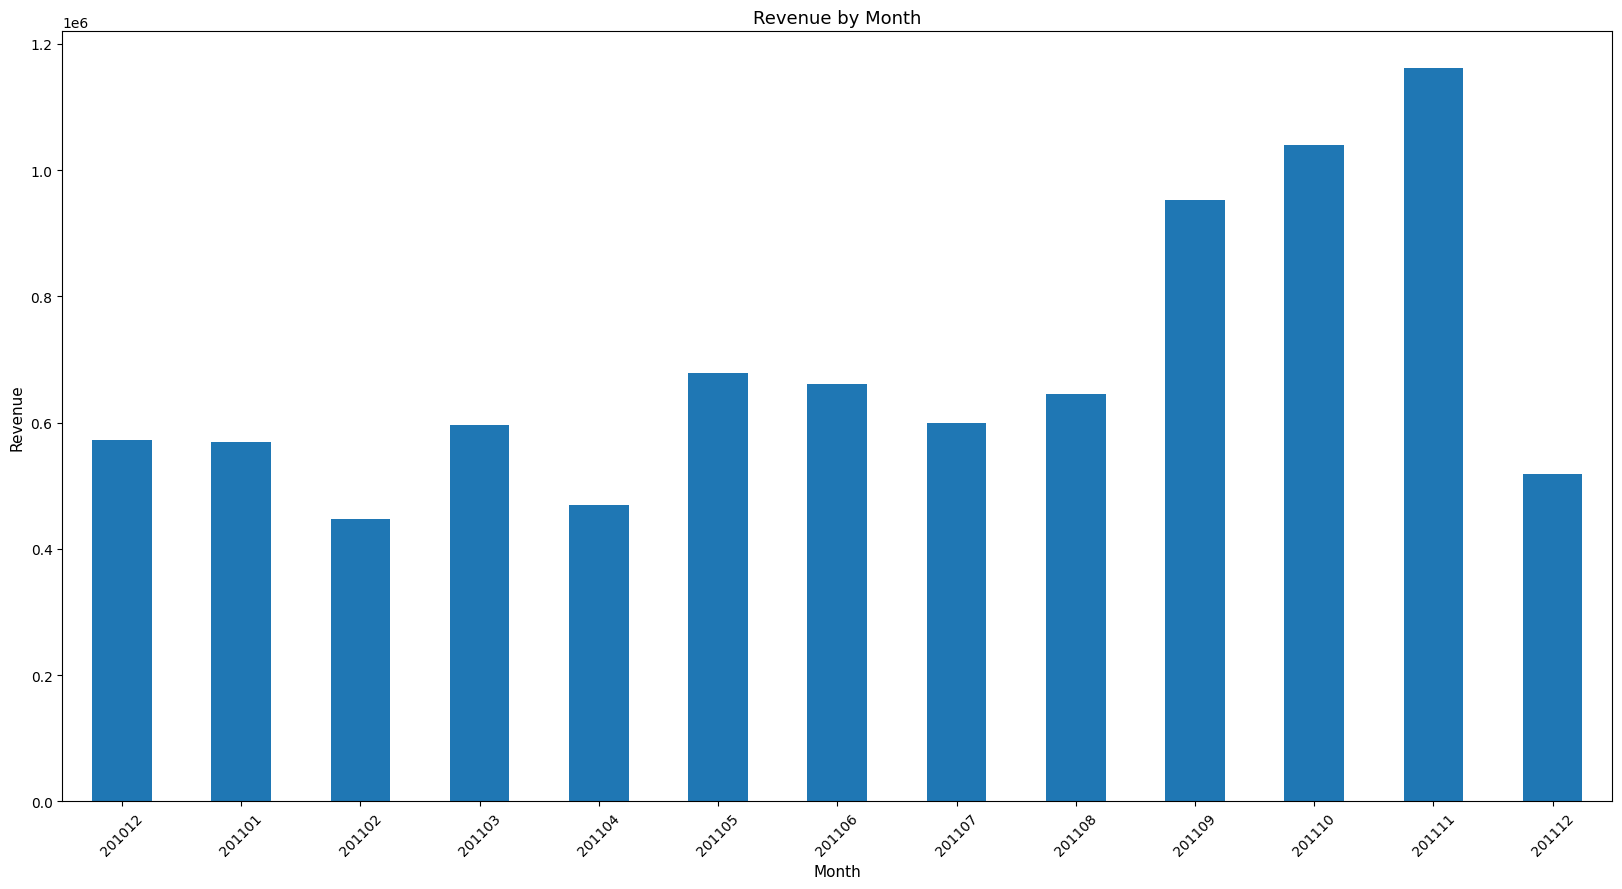

In [23]:
rev_by_month = retail.set_index('InvoiceDate').groupby(extract_month).sum()['CheckoutPrice']
rev_by_month

plot_bar(rev_by_month, 'Month', 'Revenue', 'Revenue by Month')

#### 요일별 매출

In [24]:
rev_by_dow = retail.set_index('InvoiceDate').groupby(lambda date:date.dayofweek).sum()['CheckoutPrice']
rev_by_dow

InvoiceDate
0    1367146.411
1    1700634.631
2    1588336.170
3    1976859.070
4    1485917.401
6     792514.221
Name: CheckoutPrice, dtype: float64

In [25]:
rev_by_dow = retail.set_index('InvoiceDate').groupby(lambda date: date.dayofweek).sum()['CheckoutPrice']
rev_by_dow_formatted = rev_by_dow.apply(lambda x: f"{x:,.0f}")
print(rev_by_dow_formatted)

InvoiceDate
0    1,367,146
1    1,700,635
2    1,588,336
3    1,976,859
4    1,485,917
6      792,514
Name: CheckoutPrice, dtype: object


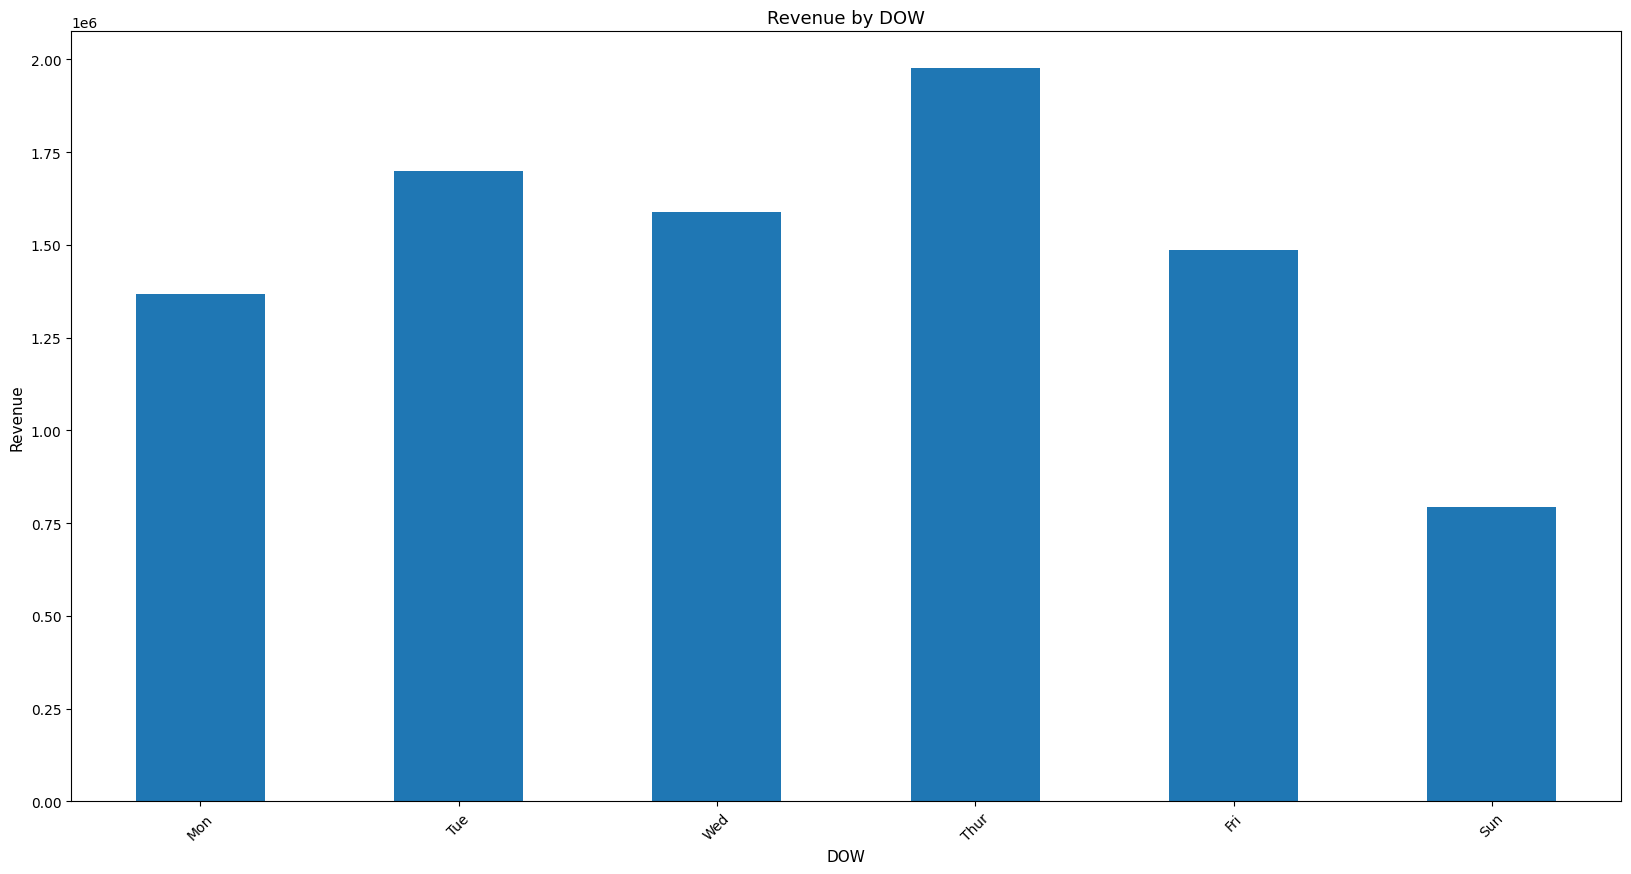

In [26]:
DAY_OF_WEEK = np.array(['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'])
rev_by_dow.index = DAY_OF_WEEK[rev_by_dow.index]
plot_bar(rev_by_dow, 'DOW', 'Revenue', 'Revenue by DOW')

#### 시간별 매출

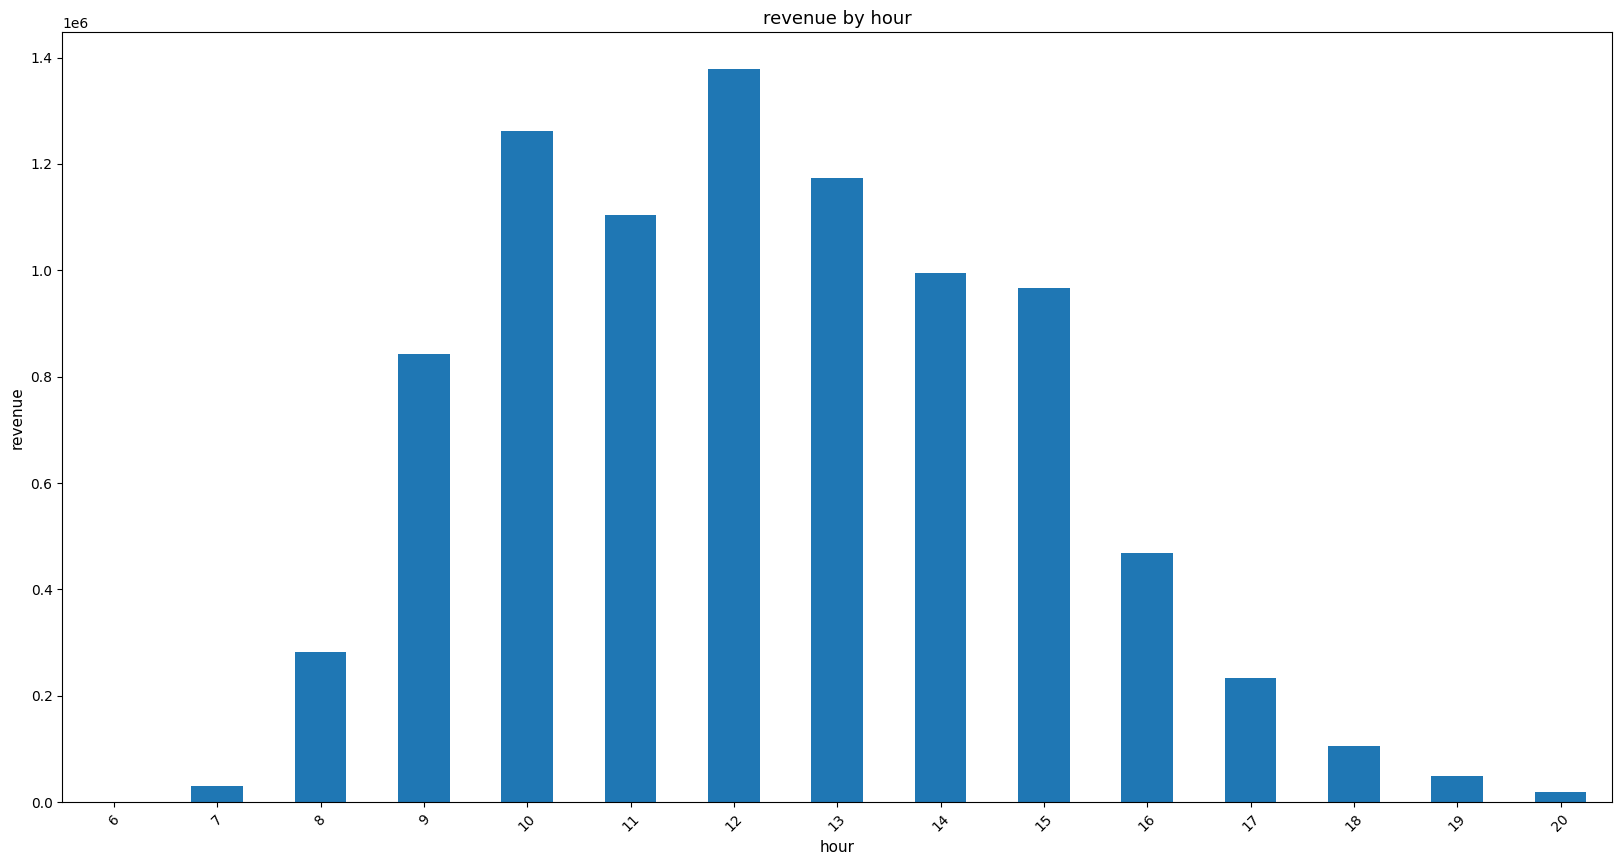

In [27]:
rev_by_hour = retail.set_index('InvoiceDate').groupby(lambda date:date.hour).sum()['CheckoutPrice']
plot_bar(rev_by_hour, 'hour', 'revenue', 'revenue by hour')

#### 매출 데이터로부터 insight 
 - 전체 매출의 82%가 UK에서 발생
 - 11년도의 가장 많은 주문이 발생한 달 11월(12월의 전체 데이터가 반영이 되진 않았음)
  - 11, 12월의 판매량이 압도(블랙프라이데이, 사이버먼데이, 크리스마스 휴일)
 - 일주일중 목요일까지는 성장세를 보이다가, 이후로 하락(토요일에는 주문X)
 - 7시를 시작으로 주문이 시작되어 12시까지 증가세, 15시까지 하락을, 15시 이후 부터 급락)

#### 제품별 metrics
 - Top 10 판매 제품
 - Top 10 매출 제품

In [31]:
top_selling = retail.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False)[:3]
print(top_selling.apply(lambda x: f"{x:,}"))


StockCode
23843    80,995
23166    77,916
84077    54,415
Name: Quantity, dtype: object


In [36]:
top_revenue = retail.groupby('StockCode')['CheckoutPrice'].sum().sort_values(ascending=False)[:10]
top_revenue.apply(lambda x: f"{x:,}")

StockCode
23843               168,469.6
22423     142,592.94999999998
85123A              100,603.5
85099B              85,220.78
23166      81,416.73000000001
POST                77,803.96
47566               68,844.33
84879               56,580.34
M                   53,779.93
23084                51,346.2
Name: CheckoutPrice, dtype: object

#### top 3 아이템의 월별 판매량 추이

In [39]:
monthly_top3 = retail.set_index('InvoiceDate').groupby(['StockCode', extract_month]).sum()[['Quantity', 'CheckoutPrice']].loc[top_selling.index]
monthly_top3

Quantity  CheckoutPrice
StockCode InvoiceDate                         
23843     201112          80995      168469.60
23166     201101          74215       77183.60
          201105            792         869.04
          201106            391         458.51
          201107            718         826.94
          201108            405         486.09
          201109            342         397.26
          201110            235         283.67
          201111            631         708.11
          201112            187         203.51
84077     201012           5139        1150.47
          201101           1488         385.44
          201102           3457         795.17
          201103           3888         943.20
          201104          10224        2281.44
          201105           4944        1249.44
          201106           1920         533.76
          201107           3600         982.56
          201108           2256         654.24
          201109           3462         985.70
          201110           8174        1953.98
          201111           4500        1294.20
          201112           1363         376.65

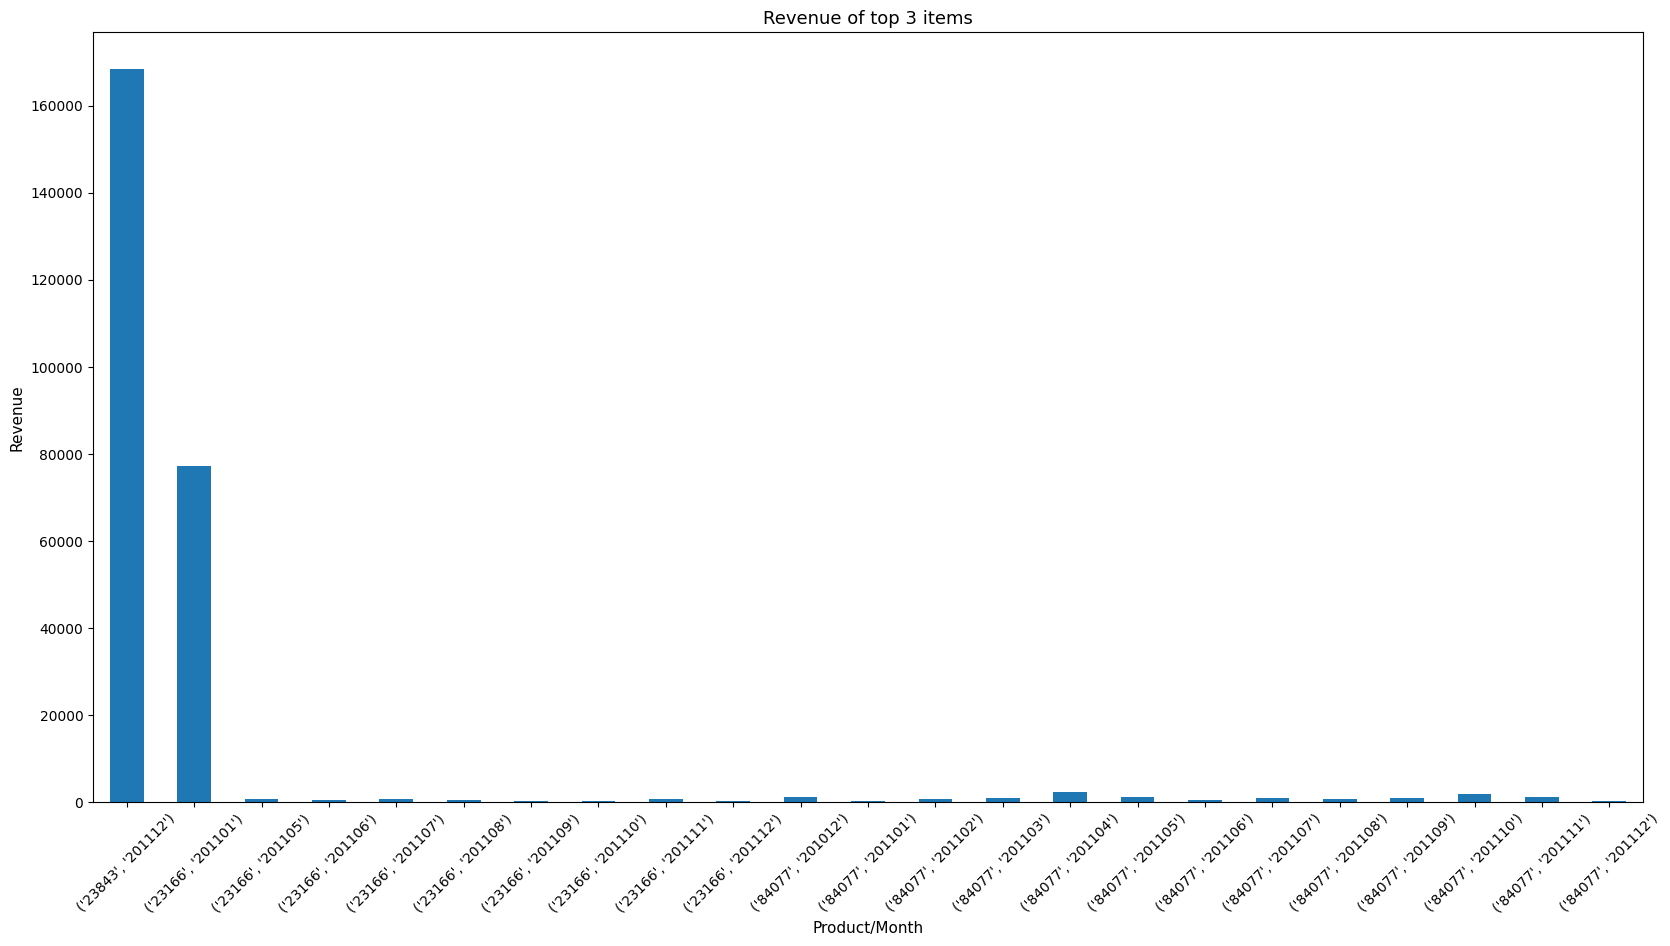

In [38]:
plot_bar(monthly_top3['CheckoutPrice'], 'Product/Month', 'Revenue', 'Revenue of top 3 items')